# Tensorflow Regression Example

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [5]:
x_vals = np.linspace(0,10,1000000)
noise = np.random.randn(len(x_vals))


y = m*x + b

m = 0.7

b = 3

In [7]:
b = 3
y = (0.7*x_vals) + b + noise

In [9]:
data_df = pd.concat([pd.DataFrame(data = x_vals, columns = ['x']),
                     pd.DataFrame(data = y, columns = ['y'])], axis = 1)

In [10]:
data_df.head()

,x,y
0,0.00000,3.299257
1,0.00001,3.915236
2,0.00002,3.364431
3,0.00003,3.311457
4,0.00004,2.644035


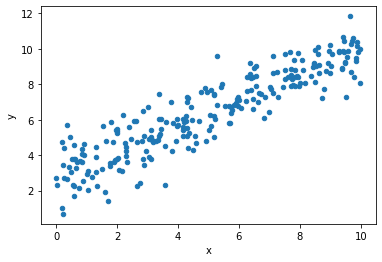

In [12]:
data_df.sample(250).plot(kind = 'scatter',
                         x = 'x',
                        y = 'y')

# TensorFlow

# Batch size

In [13]:
batch_size = 8

#variables
m = tf.Variable(0.5)
b = tf.Variable(1.0)

#placeholers
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

#graph
y_pred = m*xph + b

#loss function
error = tf.reduce_sum(tf.square(yph-y_pred))

In [15]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.001)
train = optimizer.minimize(error)

#initialize variables

init = tf.global_variables_initializer()

# session

In [19]:
with tf.Session() as sess:
    sess.run(init)
    batches = 100000
    
    for i in range(batches):
        random_index = np.random.randint(len(x_vals),
                                        size = batch_size)
        
        feed = {xph:x_vals[random_index],
               yph:y[random_index]}
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [20]:
model_m,model_b

(0.68137705, 2.936823)

In [22]:
y_hat = x_vals * model_m + model_b

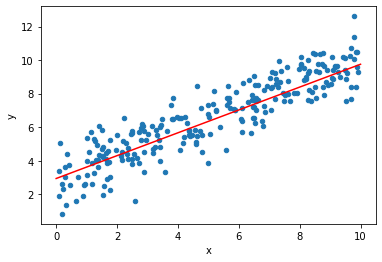

In [23]:
data_df.sample(250).plot(kind = 'scatter', x = 'x', y = 'y')
plt.plot(x_vals,y_hat,'r')